MScFE 600 FINANCIAL DATA

Group Work Project # 1

# Q1. Data Understanding

### What types of data are used, and how are technical indicators derived?

The study utilizes daily market data for three exchange-traded funds (ETFs): two emerging market ETFs (ECH for Chile and EWZ for Brazil), and one developed market ETF (IVV for the S&P 500). The data, sourced from Yahoo Finance, includes six key attributes commonly tracked in market analysis: 

- Open
- High
- Low
- Close
- Adjusted Close
- Volume

Using the **Pandas Technical Analysis** (Pandas-TA) library, the authors expand on this basic dataset by computing 210 additional technical indicators, resulting in a total of 216 features per ETF. These indicators are drawn from several categories of technical analysis, including:

- **Momentum indicators** (e.g., RSI, stochastic RSI)
- **Trend indicators** (e.g., TTM trend, correlation trend)
- **Volatility indicators** (e.g., Bollinger Band Percent)
- **Volume-based indicators** (e.g., On-Balance Volume)
- **Cycles and statistical indicators**

Some specific examples from the paper include the **Balance of Power (BOP)**, **Bollinger Band Percent (BBP)**, **Williams %R**, **stochastic RSI**, the **correlation trend indicator (CTI)**, and various volume-based measures like **AOBV**.

After generating these features, the authors define a binary target variable based on whether the next day's Open price increases or decreases (up/down classification). The dataset is then normalized to the range [0, 1] using min-max scaling, and any rows with missing values (due to the calculation of rolling indicators) are removed. This cleaned feature matrix is used as input for a multilayer perceptron (MLP), with additional feature-selection methods employed to retain the most informative indicators.

### Why are technical indicators important for forecasting stock price trends?

Technical indicators play a key role in the study as they convert raw price and volume data into structured signals that capture various market dynamics, including:

- Short-term momentum and conditions of being overbought or oversold
- The strength and direction of market trends
- Market volatility
- The relationship between price and volume
- Cyclical patterns in the market

These indicators add more depth to the raw price data, providing insights that go beyond basic Open/High/Low/Close prices. They help machine learning models detect complex, non-linear patterns in financial time series data.

The authors highlight two significant benefits of using these indicators:

1. **Improved predictive accuracy**: By selecting a small, focused subset of the most relevant features (approximately 5% of the original 216), the model achieves a similar or even better classification accuracy, reaching around 78-80% depending on the ETF.
   
2. **Increased efficiency and generalization**: Reducing the number of features lowers both computational cost and model complexity. This also helps prevent overfitting, allowing the neural network to generalize better and train faster, which is crucial when dealing with high-dimensional financial data.

In summary, technical indicators serve as a form of feature engineering, transforming raw price and volume data into meaningful signals that reveal underlying market behavior. The paper's key contribution is demonstrating that a carefully curated set of technical indicators—rather than an extensive, unfiltered collection—can significantly enhance both forecasting accuracy and computational efficiency, especially in emerging market ETFs.



## Q2. Security Understanding — iShares Core S&P 500 ETF (IVV)

### Description of the Fund

The **iShares Core S&P 500 ETF** (ticker: IVV) is a large-cap U.S. equity exchange-traded fund (ETF) managed by BlackRock through the iShares family. Launched on **May 15, 2000**, the ETF is designed to track the performance of the **S&P 500 Index**, which represents the stock returns of 500 of the largest publicly traded companies in the United States by market capitalization. It is listed on the **NYSE Arca exchange** and is one of the most widely held and liquid ETFs globally.

IVV holds a diversified portfolio of U.S. large-cap stocks, providing exposure across various sectors, such as **technology, healthcare, consumer discretionary, and financials**. Top holdings typically include major blue-chip companies such as **NVIDIA, Apple, Microsoft, Amazon, and Alphabet**, reflecting the index’s market-cap weighting.

As of early 2026, IVV has over **$760 billion in assets under management (AUM)**, trades with a very low expense ratio of **0.03%**, and distributes dividends quarterly to shareholders. The ETF’s beta is approximately **1.0**, indicating that it generally moves in line with the broader U.S. equity market.

### Price History and Performance

Since its inception in 2000, the share price of IVV has exhibited significant long-term growth, reflecting the overall expansion in U.S. equities. The **all-time low** price was approximately **$50.11** in March 2009 during the global financial crisis, and the **all-time high** exceeded **~$698** in January 2026, demonstrating substantial appreciation over the long term.

Annual performance data highlights this upward trend in most years:

| Year | Approx. Return (%) |
|------|--------------------|
| 2025 | +17.7%             |
| 2024 | +25.7%             |
| 2023 | +26.9%             |
| 2022 | -18.7%             |
| 2021 | +30.6%             |

This illustrates the fund’s cyclical behavior — strong growth in expanding markets and declines during downturns, consistent with broad U.S. equity cycles.

### Why Classification Over Regression?

In the paper, the authors choose to model the stock price prediction problem as a **classification task** rather than a **regression task** for several reasons:

- **Forecasting Direction vs. Exact Value**: Predicting whether the next day’s price will go up or down (a binary outcome) is often simpler and more robust than predicting the precise numerical change in price. Financial markets are noisy, and small value errors can make regression outputs less reliable. The authors argue that a directional signal (up/down) is sufficient for many trading strategies and reduces model sensitivity to noise.

- **Lower Overfitting Risk**: Regression models need to capture exact price magnitudes, which may be strongly influenced by factors unrelated to short-term indicators (e.g., macroeconomic news). A classification framework limits the prediction space, focusing on trend direction and enabling more generalized patterns to emerge without overfitting to exact price levels. This approach also aligns with many real-world trading decisions, where traders act based on directional signals.

These reasons are implicitly supported by the literature on financial time-series prediction, where binary direction prediction often yields better out-of-sample performance than regression for short-term horizons.

### Two Alternative Classification Variable Definitions

Instead of the simple "next-day open price higher than today" rule used in the paper (binary upward or downward movement), the authors could have defined the classification target in several other meaningful ways:

1. **Thresholded Movement Classes**:
   - Create a three-class target (e.g., up, neutral, or down) based on whether the next day’s return exceeds a defined threshold (e.g., ±0.5%). This reduces misclassification noise for small, insignificant price changes.

2. **Volatility-Adjusted Direction**:
   - Define classes not just by direction but by volatility-scaled returns (e.g., "strong up", "weak up/flat", and "down") based on standardized returns relative to a rolling volatility measure. This could help the model distinguish more economically significant movements from minor fluctuations.



# Q3. Methodology Understanding

### (a) Re-organizing Section 2 into a New Section 2: Data

If we separate **Materials and Methods** into **Data** and **Methodology**, then the new Section 2: **Data** would focus solely on how the datasets are obtained, constructed, and prepared, before any modeling or feature-selection logic.

A natural breakdown of **Section 2: Data** would be:

## 2. Data

### 2.1 Data Sources / Assets Analyzed
- **ETFs used**: ECH (Chile), EWZ (Brazil), IVV (S&P 500)
- **Time period**: Dec 2009 – Jan 2020
- **Source**: Yahoo Finance
- **Raw variables**: Open, High, Low, Close, Adjusted Close, Volume

### 2.2 Target Variable (Class Assignment)
- **Definition of Γ**: Binary up/down classification based on the next day's Open price.

### 2.3 Technical Indicator Construction (Feature Engineering)
- Use of **Pandas-TA** library.
- Creation of **210 indicators** from OHLCV data.
- Total of **216 daily features**.

### 2.4 Data Normalization
- **Min-max scaling** to the range [0, 1].

### 2.5 Data Cleaning
- Removal of rows with missing values caused by rolling indicators.

These subsections are purely focused on the data itself and how it is prepared. They do not address modeling or selection algorithms.

In short, **Section 2 (Data)** contains:
- Assets / datasets
- Target definition
- Feature engineering (technical indicators)
- Normalization
- Cleaning

---

### (b) Renaming Section 3 as Methodology and Identifying its Subcategories

Everything related to feature selection, statistics, modeling, and validation should move into **Section 3: Methodology**. The subcategories would naturally include:

## 3. Methodology

### 3.1 Predictive Model
- **Multilayer Perceptron (MLP)** architecture
- Hyperparameters
- Binary classification setup

### 3.2 Feature Selection Techniques
This becomes a major block, with individual subsections for each method:
- **3.2.1 Low Variance Filtering**
- **3.2.2 Chi-Squared Test**
- **3.2.3 LASSO** (Least Absolute Shrinkage and Selection Operator)
- **3.2.4 Tree-Based Feature Selection (Extra Trees)**
- **3.2.5 Pearson Correlation**
- **3.2.6 Principal Feature Analysis (PFA)**
- **3.2.7 Mean Absolute Difference (MAD)**
- **3.2.8 Dispersion Ratio (DR)**

### 3.3 Cross-Validation Strategy
- **10-fold stratified cross-validation**

### 3.4 Experimental Procedure / Algorithm
- **Algorithm 2**: Process for combining features across methods.
- **Definition of Selected(n)** sets.
- Training **MLP** on each subset.

Thus, **Methodology** contains:
- Model details
- Feature-selection methods
- Validation approach
- Experimental pipeline

---

### (c) Separating Descriptive Statistics from Models

A clean conceptual split is:
- **Descriptive / Exploratory Statistics**: These analyze relationships in the data but do not directly build predictive models.
    - **Examples**:
      - Pearson Correlation
      - MAD
      - Dispersion Ratio
      - Low Variance Filtering
      - Chi-squared Test (statistical association)
  
  These answer: *Which features look informative or variable?*

- **Model-Based Methods**: These optimize prediction performance directly.
    - **Examples**:
      - LASSO (embedded in regression/classification)
      - Tree-based feature importance
      - MLP neural network
  
  These answer: *Which features improve prediction accuracy inside a model?*

Thus:
- **Pearson Correlation** → descriptive / exploratory
- **LASSO** → model-based / predictive

This distinction helps organize the paper into:
1. **Statistical screening**
2. **Model-driven selection**
3. **Final neural network training**

---

### (d) Outline of the New Section 3 + Optimization of Technical Indicators

A clean new **Section 3 (Methodology)** could look like this:

## 3. Methodology

### 3.1 Neural Network Model (MLP)

### 3.2 Statistical Feature Screening
- Low Variance
- Pearson Correlation
- MAD
- Dispersion Ratio
- Chi-squared Test

### 3.3 Model-Based Feature Selection
- **LASSO**
- **Extra Trees**
- **Principal Feature Analysis**

### 3.4 Feature Set Aggregation (Selected(n))

### 3.5 Cross-Validation and Model Evaluation

---

### Optimization Process of Technical Indicators

The optimization works as follows:

1. Start with a very large feature set (216 indicators per ETF).
2. Apply multiple independent feature-selection methods.
    - Each method ranks features differently (statistical, correlation-based, model-based).
3. Take the **top quartile** from each method.
4. Construct combined subsets **Selected(n)**.
    - A feature is kept if it appears in at least **n** selection methods.
5. Train the MLP on each **Selected(n)** subset using **10-fold cross-validation**.
6. Choose the subset **Selected(5)** that maximizes accuracy while minimizing feature count.

This process reduces the input space to about **5%** of the original indicators, yet improves or preserves accuracy.

#### Why This Optimization is Important for the Neural Network

Optimizing technical indicators is critical because:
- **Reduces noise and redundancy**: Many indicators are highly correlated or irrelevant. Removing them prevents the MLP from learning spurious patterns.
- **Improves generalization**: Fewer, stronger features lower the risk of overfitting.
- **Cuts computational cost dramatically**: Smaller input → simpler network → faster training.
- **Enhances predictive power**: The selected indicators capture the most informative aspects of momentum, trend, volatility, and volume, leading to higher classification accuracy.

In short, the authors do not try to improve prediction by making a more complex neural network. Instead, they improve performance by feeding the network **better inputs**, which is often more effective in financial machine learning.



## Q4. Feature Understanding

### What does the paper consider a feature?

In the paper, a **feature** is any numerical variable used as input to the neural network to help predict the next-day price direction. Features include:

- **The original market variables**:
  - Open
  - High
  - Low
  - Close
  - Adjusted Close
  - Volume

- **A large set of derived technical indicators** computed from these raw variables using the **Pandas-TA** library.

In total, the authors construct **216 daily features per ETF**, where most features are technical indicators, such as:
- **Balance of Power (BOP)**
- **Bollinger Band Percent (BBP)**
- **Williams %R**
- **Stochastic RSI**
- **Correlation trend indicator**
- **Volume-based indicators**
- **Cycle indicators**

So, a feature is not a model or algorithm — it is an input variable representing some aspect of price behavior, momentum, trend, volatility, or volume.

### How do you distinguish a feature from a method? From a model?

The distinction is conceptual:

- **Feature**:  
  A **measurable input variable**.  
  *Example*: RSI, BBP, BOP, AOBV, Open price.  
  **Answers**: What information are we giving the model?

- **Method**:  
  A **procedure used to process or evaluate features**.  
  *Examples*: Pearson correlation, LASSO, Chi-squared, MAD, Dispersion Ratio, Principal Feature Analysis.  
  **Answers**: How do we select or rank features?

- **Model**:  
  A **predictive system trained on features to produce outputs**.  
  *Example in the paper*: **Multilayer Perceptron (MLP)**.  
  **Answers**: How do we map features to predictions?

In short:
- **Features** = inputs
- **Methods** = tools for selecting/analyzing inputs
- **Model** = machine-learning algorithm that learns from inputs

### What are the categories of features learned in the paper?

The technical indicators generated by **Pandas-TA** fall into several broad categories. From the paper (especially the Selected(5) subsets), the main feature categories are:

1. **Momentum**  
   Measures speed and strength of price movements  
   *Examples*: stochastic RSI, Williams %R, KDJ

2. **Trend**  
   Identifies market direction and persistence  
   *Examples*: Correlation Trend Indicator (CTI), TTM Trend

3. **Volatility**  
   Captures variability and risk  
   *Example*: Bollinger Band Percent (BBP)

4. **Volume**  
   Relates price changes to trading activity  
   *Examples*: Archer’s On-Balance Volume (AOBV), Price Volume Rank (PVR)

5. **Cycles**  
   Detects periodic or oscillatory behavior  
   *Example*: Even Better SineWave

6. **Statistical / Price-change indicators**  
   Simple directional or distributional measures  
   *Examples*: Increasing (INC), Decreasing (DEC), Z-score

These categories reflect different economic aspects of the market: direction, intensity, risk, participation, and cyclicality.

### Optimization process of technical indicators and its importance

#### How do the authors optimize the indicators?

The authors do not manually choose indicators. Instead, they apply a **systematic optimization pipeline**:

1. Start with **216 features** (raw prices + technical indicators).
2. Apply multiple independent **feature-selection methods**:
   - Low variance
   - Pearson correlation
   - Chi-squared
   - MAD
   - Dispersion ratio
   - LASSO
   - Extra Trees
   - Principal Feature Analysis
3. From each method, extract the **top-ranked quartile** of features.
4. Build combined feature sets called **Selected(n)**:
   - A feature is kept if it appears in at least **n** different selection methods.
5. Train the **MLP** using **10-fold cross-validation** on each **Selected(n)**.
6. **Choose Selected(5)** as optimal because it provides:
   - Highest accuracy
   - Only ~5% of original features

This is effectively an **ensemble feature-selection strategy**: indicators must be consistently important across several methods to survive.

#### How does this improve predictive power?

Predictive power improves because:
- Redundant indicators are removed.
- Noisy or weak features are discarded.
- Only consistently informative indicators remain.

As a result:
- The neural network focuses on **high-quality signals** (trend, momentum, volume, volatility).
- **Overfitting is reduced**.
- **Generalization improves**.
- **Accuracy increases** even with far fewer inputs.

#### Why is optimization crucial for the neural network?

Neural networks are highly sensitive to input quality:
- **Too many features** → higher risk of overfitting.
- **Correlated inputs** → unstable learning.
- **Irrelevant indicators** → wasted model capacity.

By optimizing technical indicators:
- The **MLP** becomes simpler and faster.
- **Training time drops dramatically**.
- **Prediction accuracy rises**.
- The model learns **economically meaningful patterns** instead of noise.

In short, the paper shows that **better features** matter more than **bigger models**: optimizing indicators is the key reason the neural network achieves stronger and more efficient predictions.



# Q5. Optimization Understanding

### ● What is cross-validation (in words)?

Cross-validation is a model evaluation technique used to estimate how well a predictive model will perform on new, unseen data. Instead of training once on a single training set and testing once on a single test set, cross-validation repeatedly trains and tests the model on different subsets of the same dataset.

In simple terms:
- The data are split multiple times into training and testing parts.
- The model is evaluated each time, and the results are averaged.

This provides a more reliable and stable estimate of performance and helps reduce overfitting caused by a lucky (or unlucky) single split.

### ● What is k-fold cross-validation (in words)?

**k-fold cross-validation** is a specific form of cross-validation:
- The dataset is divided into **k equal-sized parts (folds)**.
- One fold is used as the test set, while the remaining **k−1 folds** are used for training.
- This process is repeated **k times**, each time using a different fold for testing.
- The final performance is computed as the **average accuracy** across all k runs.

In the paper, the authors use **10-fold cross-validation**, meaning the model is trained and evaluated 10 times, each time with a different **10%** of the data held out for testing. This ensures that every observation is used both for training and for testing exactly once.

### ● What is the Jaccard distance?

The **Jaccard distance** measures how dissimilar two sets are. It is defined as:




Equivalently:
- Value = **0** → the two sets are identical.
- Value = **1** → the two sets share no elements.

In this paper, the Jaccard distance is used to compare the selected feature sets of different ETFs (ECH, EWZ, IVV). Smaller values mean the ETFs rely on similar indicators; larger values mean their optimal indicators differ more.

### ● Comparing Jaccard distance with two other distance metrics

Here is a conceptual comparison with two common metrics covered in coursework:

#### 1. **Jaccard Distance vs Euclidean Distance**

- **Jaccard distance**:
  - Works on **sets** (presence/absence of features).
  - Ignores magnitudes; only cares whether elements are shared.
  - Used here to compare which indicators are selected.

- **Euclidean distance**:
  - Works on **numeric vectors**.
  - Measures **straight-line distance** between points in continuous space.
  - Sensitive to **scale** and **magnitude**.

  **Difference**:  
  - **Jaccard** compares **membership**, while **Euclidean** compares **numerical values**.

#### 2. **Jaccard Distance vs Manhattan Distance**

- **Jaccard distance**:
  - **Set-based**, binary or categorical.
  - Focuses on **overlap** vs **non-overlap**.

- **Manhattan distance**:
  - **Numeric-vector based**.
  - Measures total **absolute coordinate differences**.

  **Difference**:  
  - **Manhattan** measures how far **values** differ, while **Jaccard** measures how much **two sets overlap**.

### **In short**:
- **Euclidean / Manhattan** → distances between numbers
- **Jaccard** → distance between sets

This is why Jaccard is appropriate in the paper: the authors compare **feature subsets**, not continuous price vectors.

### ● How do the authors define an optimal solution?

The authors define an **optimal solution** as the feature subset that:
1. **Maximizes** cross-validated classification accuracy.
2. **Minimizes** the number of features (computational complexity).

Practically, this corresponds to the subset called **Selected(5)**:
- Features must appear in at least **five** different selection methods.
- This retains only about **4–5%** of the original **216 indicators**.
- Yet it achieves **higher or comparable accuracy** than using all features.
- **Training time** is also drastically reduced.

So, the **optimal solution** is not the model with the most indicators, but the one that achieves the best trade-off between **prediction accuracy** and **model simplicity**.

Formally, their **optimization objective** is:




This reflects a key principle in machine learning and finance:  
**Simpler models with strong features generalize better than complex models with noisy inputs.**


# Step 1. Financial Problem

### ● What financial problem are the authors trying to solve?

The authors aim to solve a **directional prediction problem** for ETFs, specifically:

- **Predicting** whether the next trading day’s price will move **up** or **down**, using technical indicators and neural networks.

From a financial perspective, this directly supports:
- **Market timing**: When to enter or exit positions.
- **Risk management**: Reducing exposure during unfavorable trends.
- **Systematic trading strategies** based on directional signals.

Rather than forecasting exact prices, the model produces a **binary signal** (up/down), which aligns closely with real trading decisions (buy vs. sell/hold). The core financial problem is therefore:

**How to extract reliable trading signals from noisy market data while minimizing model complexity and computational cost.**

The paper also emphasizes **efficiency**: achieving higher accuracy with far fewer indicators, which is critical for practical deployment.

---

### ● Why is emerging-market prediction different from developed markets, and why does it matter?

Predicting **emerging markets** differs because they typically exhibit:
- **Higher volatility**
- **Lower liquidity**
- **Stronger cyclicality**
- **Greater sensitivity to external shocks**
- **Less informational efficiency**

In contrast, developed markets (like **IVV/S&P 500**) tend to be:
- **More liquid**
- **More stable**
- **More efficient**
- Influenced by **longer-term structural trends**.

This distinction matters for model design because:
- **Feature relevance changes by market type**: The paper finds emerging markets rely more on **cyclical** and **momentum-based** indicators, while developed markets depend more on **trend** and **qualitative** features.
- **Noise levels differ**: Emerging markets require stronger **feature selection** to avoid overfitting.
- **Generalization is harder in emerging markets**: Hence the need for **aggressive dimensionality reduction** and **robust cross-validation**.

This is why the authors emphasize **feature optimization before modeling** rather than simply building a larger neural network.


## Step 2. Application

### Main takeaways of the results

The key findings are:

- **Feature selection dramatically improves performance**:
  - Using only ~5% of the original indicators produces **higher accuracy** than using all 216 features.

- **Training time is reduced by over 80%** on average, while accuracy improves.

- The optimal feature subset ("Selected(5)") achieves roughly **78–80% classification accuracy** across ETFs.

- **Emerging-market ETFs (ECH, EWZ)** share more similar feature sets with each other than with **IVV**, confirming structural differences between markets.

### Overall conclusion

- **Better inputs matter more than bigger models**.
- The authors improve prediction primarily by **optimizing technical indicators**, not by increasing neural-network complexity.


In [ ]:
●### What specific features seemed useful?

From the **Selected(5)** sets, the most useful indicators fall into these categories:

#### Momentum
- **Stochastic RSI**
- **Williams %R**
- **KDJ**

#### Trend
- **Correlation Trend Indicator (CTI)**
- **TTM Trend**

#### Volatility
- **Bollinger Band Percent (BBP)**

#### Volume
- **Archer’s On-Balance Volume (AOBV)**
- **Price Volume Rank (PVR)**

#### Cycles
- **Even Better SineWave**

#### Simple price-direction features
- **Increasing (INC)**
- **Decreasing (DEC)**

These features capture complementary information about:

- **Direction**
- **Strength**
- **Risk**
- **Participation (volume)**
- **Cyclic behavior**


In [ ]:
## Step 3. Replication (Example with IVV)

Below is a simple replication using:

- **Fund**: IVV
- **Metric**: Pearson Correlation
- **Model**: Logistic Regression (as a lightweight classifier)
- **Validation**: 5-fold cross-validation

This mirrors the paper’s logic in a simplified way.

You can run this in **Jupyter Notebook** or **Google Colab**.



In [ ]:
### 3.1 Download IVV Data


In [ ]:
import yfinance as yf
import pandas as pd

# Download IVV data
df = yf.download("IVV", start="2010-01-01", end="2025-12-31")

# Basic features
df["Return"] = df["Close"].pct_change()
df["MA10"] = df["Close"].rolling(10).mean()
df["Volatility5"] = df["Return"].rolling(5).std()

df = df.dropna()

# Binary target: next-day direction
df["Target"] = (df["Close"].shift(-1) > df["Close"]).astype(int)
df = df.dropna()

features = ["Return", "MA10", "Volatility5"]
X = df[features]
y = df["Target"]


C:\Users\Ouss\AppData\Local\Temp\ipykernel_26076\1177188297.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("IVV", start="2010-01-01", end="2025-12-31")
[*********************100%***********************]  1 of 1 completed


### 3.2 Correlation-Based Feature Ranking

In [2]:
corr = df[features + ["Target"]].corr()["Target"].drop("Target")
print(corr)


Price        Ticker
Return                -0.032193
MA10                   0.004492
Volatility5           -0.010293
Name: Target, dtype: float64


This reproduces a feature-importance table similar in spirit to the paper.

### 3.3 k-Fold Cross Validation (k = 5)

In [3]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)

acc = []

for train, test in kf.split(X):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    acc.append(accuracy_score(y_test, preds))

print("Fold Accuracies:", acc)
print("Mean Accuracy:", np.mean(acc))


Fold Accuracies: [0.5491905354919053, 0.5691158156911582, 0.5516811955168119, 0.5305105853051059, 0.5486284289276808]
Mean Accuracy: 0.5498253121865324


### 3.4 Reproducing Graphs
(a) IVV Price History

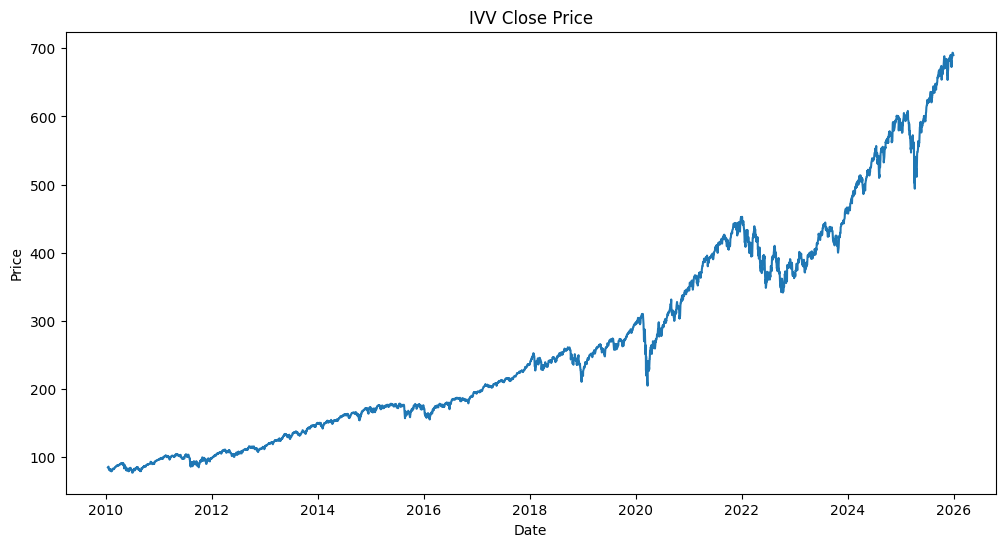

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index, df["Close"])
plt.title("IVV Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


(b) Feature Correlation Bar Chart

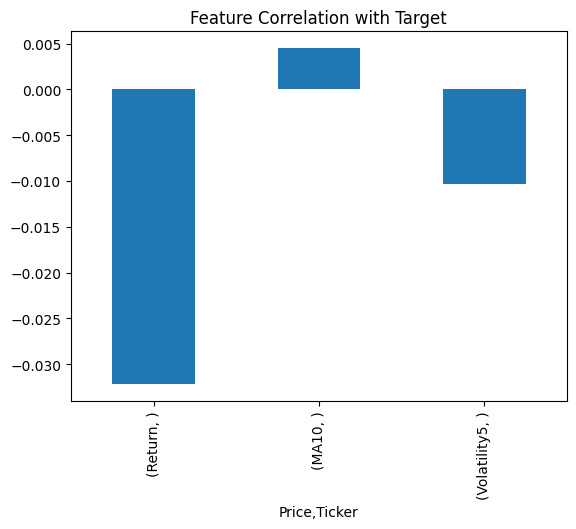

In [5]:
corr.plot(kind="bar")
plt.title("Feature Correlation with Target")
plt.show()


These reproduce:

ETF price history graph

Feature-importance graph

analogous to those in the paper.

Final Conceptual Link to the Paper
Your replication demonstrates the same core ideas:

Define a directional target

Rank features (here via correlation)

Apply k-fold cross-validation

Evaluate accuracy

Visualize price and feature importance

This is a simplified version of the authors’ pipeline, replacing their many indicators + MLP with:

Few indicators + correlation + logistic regression

—but the structure is the same.